# 어플리뷰파일 만들기

In [1]:
# step 1. 구글플레이 스크랩퍼를 이용해서  경기지역화폐어플 리뷰 데이터 가져온 후, csv 파일로 저장
# 어플 리뷰 크롤링 하기
!pip install google-play-scraper
from google_play_scraper import app, reviews, Sort

In [2]:
# 앱의 패키지 이름을 지정
app_package = 'gov.gyeonggi.ggcard'  # 특정 어플의 패키지 이름

# 앱 정보 가져오기
app_info = app(app_package)
print(app_info)

{'title': '경기지역화폐', 'description': "▶ What is Gyeonggi local currency?\r\nIt is a local love gift certificate in the form of a card that can be used in each city and county in Gyeonggi-do, and can be easily applied for and recharged through the Gyeonggi local currency app.\r\nWhenever you recharge the amount to be used with a Gyeonggi local currency card, you can receive incentives provided by each local government to revitalize the local economy, and if you pay at a local love gift certificate store in Gyeonggi-do, you can receive additional benefits for each store.\r\nAlso, check out the policies and news of 28 cities and counties in Gyeonggi-do on the Gyeonggi Local Currency App!\r\n\r\n* Gyeonggi local currency can be used at local Love Gift Certificate affiliated stores in each city and county. Search for stores available in the Gyeonggi local currency app [Find a payment store]!\r\n\r\n▶ Convenient local love gift certificate in card form\r\n- Apply now for a local card in Gyeong

In [3]:
# 앱 리뷰 가져오기 (최대 200개, 언어: 한국어, 국가: 한국, 정렬: 최신순)
app_reviews = []  ## 추출된 리뷰를 저장하기 위해서 설정한 변수(물건을 담기 위한 빈 트레이를 만든다고 생각)
count = 0  ## 리뷰의 개수 초기값 설정
desired_reviews_count = 500  ## 추출하고자 하는 리뷰의 개수

while count < desired_reviews_count:
    page_reviews, token = reviews(app_package, 
                                  lang='ko', 
                                  country='kr', 
                                  sort=Sort.NEWEST, 
                                  count=250, 
                                  continuation_token=None if count == 0 else token)

    app_reviews.extend(page_reviews)  ## 각 페이지에서 가져온 리뷰를 app_reviews 리스트에 추가
    count += len(page_reviews)  ## 현재까지 가져온 리뷰의 총 수에 현재 페이지에서 가져온 리뷰의 수를 더해줌

    if not token or count >= desired_reviews_count:  ## 추출하고자 하는 리뷰의 개수가 count의 값보다 크면 해당 반복문 종료
        break

In [4]:
# 리뷰 정보를 데이터프레임으로 변환
import pandas as pd  # Pandas라는 라이브러리를 호출
app_reviews_df = pd.DataFrame(app_reviews)  # 리스트 형태로 저장된 리스트를 dataframe 형식으로 변경

# 출력하여 내용 확인
print(app_reviews_df)

# 데이터프레임을 CSV 파일로 저장
app_reviews_df.to_csv('ggcard_review_data.csv', index=False, encoding = 'utf-8-sig')

                                 reviewId               userName  \
0    7d6859db-57ba-4221-8e86-7dab2d001127  Cho Myeongjin (Brown)   
1    ba9d106d-e3f5-498b-a40e-8f6933ad0d9f                 MS Lee   
2    ebda9f1a-70e0-455b-9c2a-cbd9bf774a3f                    유범열   
3    d3044280-b2f3-4490-9a7b-cd0cbecfa03c                    고재설   
4    ab74b706-acc7-4829-8105-5b920460a9ca                  김절세미인   
..                                    ...                    ...   
495  753f36fc-835a-4a72-b21f-9be6f3825bf5                   안또로리   
496  97cc9a66-b127-4687-9ec7-26cd877b4d17               Zayden 지   
497  574a0cf0-c6c0-4b84-983c-65cb508cfa2d                     룩킹   
498  cf350e72-b4a0-454f-bbc5-28dd74573164                    유기만   
499  b918cf8f-68f0-46f8-9bb9-6b4c01cb0981                     호두   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a-/ALV-U...   
1    https://play-lh.googleusercontent.com/a/ACg8oc...   
2    http

# 어플리뷰 긍부정 나누기

In [5]:
#Step2. 별점별로 랜덤하게 데이터 추출 및 추출한 데이터를 긍정과 부정으로 나누기

df = pd.read_csv('ggcard_review_data.csv', encoding='utf-8-sig')

# 데이터프레임 정보 확인
df.shape  # 몇 열 몇 행으로 이루어져 있는지 확인할 수 있는 함수
df.info()  # Column에 현재 데이터 프레임을 구성하고 있는 열(속성)의 이름 파악 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              500 non-null    object
 1   userName              500 non-null    object
 2   userImage             500 non-null    object
 3   content               500 non-null    object
 4   score                 500 non-null    int64 
 5   thumbsUpCount         500 non-null    int64 
 6   reviewCreatedVersion  462 non-null    object
 7   at                    500 non-null    object
 8   replyContent          500 non-null    object
 9   repliedAt             500 non-null    object
 10  appVersion            462 non-null    object
dtypes: int64(2), object(9)
memory usage: 43.1+ KB


In [6]:
# 데이터프레임에서 필요한 열 추출
df2 = df[['userName', 'content', 'score', 'thumbsUpCount', 'at']] # 현재 프로젝트를 진행함에 있어서 필요하다고 생각되는 것은 'userName, content, score, thumbsUpCount, at'

# 데이터프레임에 잘 추출되었는지 확인
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       500 non-null    object
 1   content        500 non-null    object
 2   score          500 non-null    int64 
 3   thumbsUpCount  500 non-null    int64 
 4   at             500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [7]:
# 'score' 열을 기준으로 그룹화하고 각 그룹의 크기를 계산하여 출력
score_counts = df2.groupby('score').size()  # groupby 함수를 이용해 동일한 값에 대해 그룹화, size를 통해 개수파악
print(score_counts)

score
1    117
2     35
3     46
4     57
5    245
dtype: int64


In [8]:
# 랜덤 샘플 추출하기(1점 : 59, 2점 : 18, 3점 : 23, 4점 : 29, 5점 : 123) 절반씩 / 비복원추출
score_1 = df2[df2['score'] == 1].sample(n=59, random_state=7, replace=True)
score_2 = df2[df2['score'] == 2].sample(n=18, random_state=7, replace=True)
score_3 = df2[df2['score'] == 3].sample(n=23, random_state=7, replace=True)
score_4 = df2[df2['score'] == 4].sample(n=29, random_state=7, replace=True)
score_5 = df2[df2['score'] == 5].sample(n=123, random_state=7, replace=True)

# 추출된 데이터프레임 합치기
result_df = pd.concat([score_1, score_2, score_3, score_4, score_5], ignore_index = True)
print(result_df)

              userName                                            content  \
0           ?? “???” ?                                               시져시져   
1                 아기장갑                                 최종단계에서 결제완료가 왜 안되요   
2                  이성열                                               사용내역   
3              raphael  와이파이로 연결시 연결오류가 발생합니다. 여자친구 폰도 동일한 증상입니다 LTE로는...   
4                  연수이  해외에서는 실행이 안되나요? 해외출장중이라 지원금 신청하려면 카드발급 받아야하는데 ...   
..                 ...                                                ...   
247                장옥련          가맹점이 많아 사용하기 편하며 분실시에도 서비스가좋아 재발행되었고 편합니다   
248                김성우                                            굿~ 좋아요!   
249  박 Park신범 Shinbeom                                               좋아요~   
250                류연수                                          환불 어떻게하나요   
251                정석재                                          경기도에 최적앱🍌   

     score  thumbsUpCount                   at  
0        1              0 

In [9]:
# 해당 데이터프레임에 긍정과 부정 라벨링하기
## score 열의 값이 4 이상인 경우 1(긍정)로, 아닌 경우 0(부정)으로 설정하여 sentiment_label 열을 만듦
result_df['sentiment_label'] = 0  # sentiment_label 이라는 열을 만들고, 해당 열의 값을 0으로 초기화(전체 부정)
result_df.loc[result_df['score'] >= 4, 'sentiment_label'] = 1
print(result_df)

              userName                                            content  \
0           ?? “???” ?                                               시져시져   
1                 아기장갑                                 최종단계에서 결제완료가 왜 안되요   
2                  이성열                                               사용내역   
3              raphael  와이파이로 연결시 연결오류가 발생합니다. 여자친구 폰도 동일한 증상입니다 LTE로는...   
4                  연수이  해외에서는 실행이 안되나요? 해외출장중이라 지원금 신청하려면 카드발급 받아야하는데 ...   
..                 ...                                                ...   
247                장옥련          가맹점이 많아 사용하기 편하며 분실시에도 서비스가좋아 재발행되었고 편합니다   
248                김성우                                            굿~ 좋아요!   
249  박 Park신범 Shinbeom                                               좋아요~   
250                류연수                                          환불 어떻게하나요   
251                정석재                                          경기도에 최적앱🍌   

     score  thumbsUpCount                   at  sentiment_label  
0        

In [10]:
# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('labeling_random_reviews(each 50).csv', index=False, encoding='utf-8-sig')

# 문자 정리

In [11]:
# STEP3. 데이터를 불러오고 정규표현식을 통해 불필요한 문자 제거
# 데이터 불러오기
import pandas as pd
labeling_review = pd.read_csv('labeling_random_reviews(each 50).csv', encoding = 'utf-8')

# 데이터 형태 확인
labeling_review.shape
labeling_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   userName         252 non-null    object
 1   content          252 non-null    object
 2   score            252 non-null    int64 
 3   thumbsUpCount    252 non-null    int64 
 4   at               252 non-null    object
 5   sentiment_label  252 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.9+ KB


In [12]:
# 결측치 확인
labeling_review.isna().sum()

userName           0
content            0
score              0
thumbsUpCount      0
at                 0
sentiment_label    0
dtype: int64

In [14]:
# 데이터 전처리 - 불필요한 문자 제거하기
import re  # re라는 정규표현식을 사용하기 위한 메소드 불러오기

def preprocess_text(text):
    processed_text = re.sub('[^가-힇]', ' ', text)
    return processed_text

In [15]:
# 데이터프레임에서 'content' 열의 각 텍스트에 대해 전처리 수행
labeling_review['processing_data'] = labeling_review['content'].apply(preprocess_text)

# 전처리된 데이터 출력
print(labeling_review['processing_data'])

0                                                   시져시져
1                                     최종단계에서 결제완료가 왜 안되요
2                                                   사용내역
3      와이파이로 연결시 연결오류가 발생합니다  여자친구 폰도 동일한 증상입니다    로는...
4      해외에서는 실행이 안되나요  해외출장중이라 지원금 신청하려면 카드발급 받아야하는데 ...
                             ...                        
247            가맹점이 많아 사용하기 편하며 분실시에도 서비스가좋아 재발행되었고 편합니다
248                                              굿  좋아요 
249                                                 좋아요 
250                                            환불 어떻게하나요
251                                            경기도에 최적앱 
Name: processing_data, Length: 252, dtype: object


In [16]:
# STEP2. Konlpy를 통해 명사, 형용사, 동사를 추출하고, 단어의 길이가 1 이상인 것만 추출
# Konlpy 활용
import konlpy
from konlpy.tag import *  # Konlpy 패키지 안에 있는 모듈 전체 다 불러오기(특정 하나만도 불러올 수 있음), *은 전체를 의미
okt = Okt()

# 형태소 분석 및 형용사, 명사, 동사 추출
token_list = []
for sentence in labeling_review['processing_data']:
    token = okt.morphs(sentence, stem=True)
    token = [t for t in token if len(t) > 1]  # 한 글자인 경우 제거
    if token:  # 텅 빈 문장일 경우 추가하지 않음
        token_list.append(token)
    else:
        token_list.append([])  # 텅 빈 문장일 경우 빈 리스트 추가

In [17]:
# print(token_list)
# token_list에 각 행마다 있는 문장에 대해 토큰화를 진행한 것을 리스트 형태로 저장되어 있음
tokens = pd.Series(token_list)  # 리스트 형태의 데이터를 시리즈 형태로 변환
print(tokens)

0                                                   [지다]
1                              [최종, 단계, 에서, 결제, 완료, 안되다]
2                                                   [사용]
3      [와이파이, 연결, 연결, 오류, 발생, 하다, 여자친구, 동일하다, 증상, 이다,...
4      [해외, 에서는, 실행, 안되다, 해외, 출장, 이라, 원금, 신청, 하다, 카드,...
                             ...                        
247     [가맹, 많다, 사용, 하다, 편하다, 불다, 서비스, 좋다, 재발, 되어다, 편하다]
248                                                 [좋다]
249                                                 [좋다]
250                                       [환불, 어떻다, 하나요]
251                                            [경기도, 최적]
Length: 252, dtype: object


In [18]:
# 중복 제거 전 길이 출력
print(len(tokens)) # 252개의 행으로 이루어져 있었기 때문에 252개

252


# 긍부정 단어 빈도수 계산

In [19]:
#%% STEP3. 긍정과 부정 라벨 각각의 토큰화 된 단어에 대한 빈도 수 계산
# 긍정과 부정 라벨에 있는 토큰화된 단어들의 개수를 세기 위한 함수 설정
import numpy as np

def get_freq_count(tokens):  # 만약 중복 제거를 했다면 tokens_unique가 들어가야 함
    pos_token = tokens[labeling_review['sentiment_label'] == 1]
    neg_token = tokens[labeling_review['sentiment_label'] == 0]
    pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
    neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
    return pos_freq, neg_freq

In [23]:
pos_freq, neg_freq = get_freq_count(tokens)  # get_freq_count 함수를 통해 추출된 pos_freq값과 neg_freq값을 저장
print(pos_freq)
print(neg_freq)

하다       65
좋다       58
사용       57
있다       29
되다       23
         ..
갑자기       1
실행        1
대처        1
부탁드리다     1
어떻다       1
Length: 358, dtype: int64
하다      102
안되다      36
되다       25
없다       24
에서       22
       ... 
덕분        1
올라가다      1
게이지       1
열리다       1
모드        1
Length: 520, dtype: int64


In [24]:
# STEP4. 공통으로 포함된 단어를 불용어로 처리해 제거하기
# 상위 30위에 공동으로 존재하는 토큰 확인
top_30_pos = pos_freq[:30]  # 긍정 라벨에서 상위 30개 추출
top_30_neg = neg_freq[:30]  # 부정 라벨에서 상위 30개 추출
common_words = [p for p in top_30_pos.index if p in top_30_neg.index]
common_words

['하다', '좋다', '사용', '있다', '되다', '카드', '이다', '에서', '없다', '안되다', '하고', '아니다']

In [25]:
# 공통어를 불용어로 처리해 제거하기
clean_token_list = []
for token in tokens:  # 만약 tokens_unique를 사용했다면 tokens를 tokens_unique를 적어주어야 함
    clean_token = list(filter(lambda x: x not in common_words,token))
    clean_token_list.append(clean_token)

In [26]:
clean_tokens = pd.Series(clean_token_list) # 처리를 용이하게 하기 위해 다시 리스트 형태로 시리즈 형태로 변환
print(clean_tokens)

0                                                   [지다]
1                                       [최종, 단계, 결제, 완료]
2                                                     []
3      [와이파이, 연결, 연결, 오류, 발생, 여자친구, 동일하다, 증상, 로는, 접근,...
4      [해외, 에서는, 실행, 해외, 출장, 이라, 원금, 신청, 발급, 받다, 어플, ...
                             ...                        
247                 [가맹, 많다, 편하다, 불다, 서비스, 재발, 되어다, 편하다]
248                                                   []
249                                                   []
250                                       [환불, 어떻다, 하나요]
251                                            [경기도, 최적]
Length: 252, dtype: object


In [28]:
# 다시 긍, 부정에서 많이 쓰이는 토큰 데이터 확인
pos_freq_new, neg_freq_new = get_freq_count(clean_tokens)
print(pos_freq_new)
print(neg_freq_new)

편리하다     18
편하다      17
자다       16
지역       12
혜택       12
         ..
실행        1
대처        1
부탁드리다     1
만족        1
어떻다       1
Length: 346, dtype: int64
연결     21
으로     14
오류     14
충전     12
고객     11
       ..
대체      1
지난주     1
오류로     1
몇번      1
모드      1
Length: 508, dtype: int64


In [29]:
# 긍,부정 상위 30개 단어 확인
print("상위 30개의 긍정 단어:")
print(pos_freq_new.head(30)) # head 메소드를 통해 상위 30개를 확인. 하위의 내용을 확인하고 싶으면 .head가 아닌 .tail 활용

print("상위 30개의 부정 단어:")
print(neg_freq_new.head(30))

상위 30개의 긍정 단어:
편리하다    18
편하다     17
자다      16
지역      12
혜택      12
아주      11
되어다     10
가맹       9
많다       9
최고       7
감사하다     7
쓸다       6
등록       6
관련       6
불편하다     6
해주다      6
도움       6
보다       6
너무       5
축소       5
로그인      5
경기도      5
인데       5
필요하다     5
많이       5
마트       5
잘쓰다      5
유용하다     5
문제       4
화폐       4
dtype: int64
상위 30개의 부정 단어:
연결      21
으로      14
오류      14
충전      12
고객      11
뜨다      11
업데이트    10
어플      10
기능      10
같다      10
계속       9
접속       9
센터       9
설치       9
결제       9
만원       9
해주다      8
단계       8
보다       8
지역화폐     8
받다       8
되어다      8
않다       8
새롭다      7
실행       7
버튼       7
많다       7
가입       7
사람       7
오늘       7
dtype: int64


In [30]:
# STEP5. 상위 30개의 단어 중 불필요한 용어를 찾아 불용어 처리 하기
# 긍정 라벨에 대한 불용어 처리
pos_stopwords = ['아주', '되어다', '관련', '해주다', '보다', '너무', '인데', '많이']  # 기존에 출력한 내용을 보면서 불용어 작성

# pos_freq_new에서 불필요한 용어를 포함한 단어를 제외한 리스트
final_pos_words = [word for word in pos_freq_new.index if word not in pos_stopwords]
print(final_pos_words)

['편리하다', '편하다', '자다', '지역', '혜택', '가맹', '많다', '최고', '감사하다', '쓸다', '등록', '불편하다', '도움', '축소', '로그인', '경기도', '필요하다', '마트', '잘쓰다', '유용하다', '문제', '화폐', '경기', '지역화폐', '아이디어', '페이', '이용', '어플', '부천', '시키다', '뜨다', '버튼', '받다', '나오다', '크게', '동네', '경제', '으로', '잔액', '모르다', '느끼다', '정말', '들어오다', '센티', '에게', '충전', '가능하다', '아쉽다', '여러', '쓰다', '가족', '우유', '그래서', '안산', '프로', '확인', '활성화', '최적', '자유롭다', '기능', '가능', '없이', '최신', '걸음', '현재', '방법', '성남시', '보기', '과천', '사이', '연세', '희망', '양주시', '해보다', '버전', '깔다', '기관', '메인', '화면', '끔찍하다', '포상', '제도', '들다', '일반인', '반드시', '주다', '감사', '하나요', '이익', '보단', '학기', '들어가다', '누르다', '지갑', '하단', '신청', '방안', '나름', '이상하다', '부분', '제안', '표시', '측정', '최상', '국민', '하소연', '생활', '두다', '말다', '베트남', '접속', '되게', '버리다', '총선', '선물', '서다', '제로', '굿잡', '요긴', '쓰기', '만족하다', '그냥', '번거롭다', '용돈', '만들다', '인센티브', '스러운', '혐오', '크다', '공인', '소상', '넘다', '낮추다', '초등학생', '한정', '가입', '점포', '늘어나다', '유도', '부탁', '지만', '화성', '기준', '예산', '위치', '어르신', '에서도', '완화', '조금', '않다', '여기', '은근', '인지', '수가', '다만', '그렇다', 

In [31]:
# 빈도수 정보 가져오기
final_pos_freq = pos_freq[final_pos_words] 
print(final_pos_freq)

편리하다     18
편하다      17
자다       16
지역       12
혜택       12
         ..
실행        1
대처        1
부탁드리다     1
만족        1
어떻다       1
Length: 338, dtype: int64


In [32]:
# 상위 30개의 긍정 라벨의 단어 확인
print("상위 30개의 긍정 단어:")
print(final_pos_freq.head(30))

상위 30개의 긍정 단어:
편리하다    18
편하다     17
자다      16
지역      12
혜택      12
가맹       9
많다       9
최고       7
감사하다     7
쓸다       6
등록       6
불편하다     6
도움       6
축소       5
로그인      5
경기도      5
필요하다     5
마트       5
잘쓰다      5
유용하다     5
문제       4
화폐       4
경기       4
지역화폐     4
아이디어     4
페이       4
이용       4
어플       4
부천       4
시키다      4
dtype: int64


In [33]:
# 부정 라벨에 대한 불용어 처리
neg_stopwords = ['으로', '같다', '계속','해주다','보다','받다','되어다','않다','많다','오늘']

# neg_freq에서 불필요한 용어를 포함한 단어를 제외하여 새로운 상위 단어 리스트 생성
final_neg_words = [word for word in neg_freq_new.index if word not in neg_stopwords]
print(final_neg_words)

['연결', '오류', '충전', '고객', '뜨다', '업데이트', '어플', '기능', '접속', '센터', '설치', '결제', '만원', '단계', '지역화폐', '새롭다', '실행', '버튼', '가입', '사람', '부터', '에서는', '해결', '확인', '자다', '건지다', '휴면', '들어가다', '등록', '하라', '검색', '계좌', '가맹', '삭제', '해외', '접근', '이라', '가게', '이메일', '귀찮다', '알다', '라고', '넘다', '입력', '만들다', '지갑', '누르다', '나오다', '어떻다', '모르다', '이고', '한다는', '계정', '표시', '페이', '인데', '불편하다', '응답', '깔다', '회원', '시스템', '추가', '상담사', '갑자기', '시간', '야하다', '환경', '이런', '네트워크', '들다', '너무', '답답하다', '진짜', '지역', '예정', '안내', '써다', '캐시', '데이터', '화폐', '인하다', '그렇다', '지원', '바뀌다', '건가', '금액', '보안', '답변', '마트', '나서다', '경기도', '개선', '돼다', '로는', '인증', '완료', '라는', '와이파이', '제발', '발생', '시키다', '전화', '가능하다', '자꾸', '로그인', '이미', '해도', '신청', '수정', '실물', '결재', '먹통', '출금', '정도', '쓸다', '찾다', '차다', '쓰레기', '옮기다', '보고', '어제', '마다', '한도', '설정', '정보', '푸루', '다시', '메뉴', '홈페이지', '니까', '방법', '담당자', '광고', '거의', '리치', '꼼수', '하쟈', '붙잡다', '쪽팔리다', '반성', '지우다', '지도', '박다', '챗봇', '메시지', '바보', '처리', '인지', '경우', '부탁드리다', '종료', '경기', '끼다', '찌다', '라벨', '인게', '해제', '기준',

In [34]:
# 빈도수 정보 가져오기
final_neg_freq = neg_freq[final_neg_words]
print(final_neg_freq)

연결     21
오류     14
충전     12
고객     11
뜨다     11
       ..
대체      1
지난주     1
오류로     1
몇번      1
모드      1
Length: 498, dtype: int64


In [35]:
# 상위 30개의 부정 라벨의 단어 확인
print("상위 30개의 부정 단어:")
print(final_neg_freq.head(30))

상위 30개의 부정 단어:
연결      21
오류      14
충전      12
고객      11
뜨다      11
업데이트    10
어플      10
기능      10
접속       9
센터       9
설치       9
결제       9
만원       9
단계       8
지역화폐     8
새롭다      7
실행       7
버튼       7
가입       7
사람       7
부터       6
에서는      6
해결       6
확인       6
자다       6
건지다      5
휴면       5
들어가다     5
등록       5
하라       5
dtype: int64


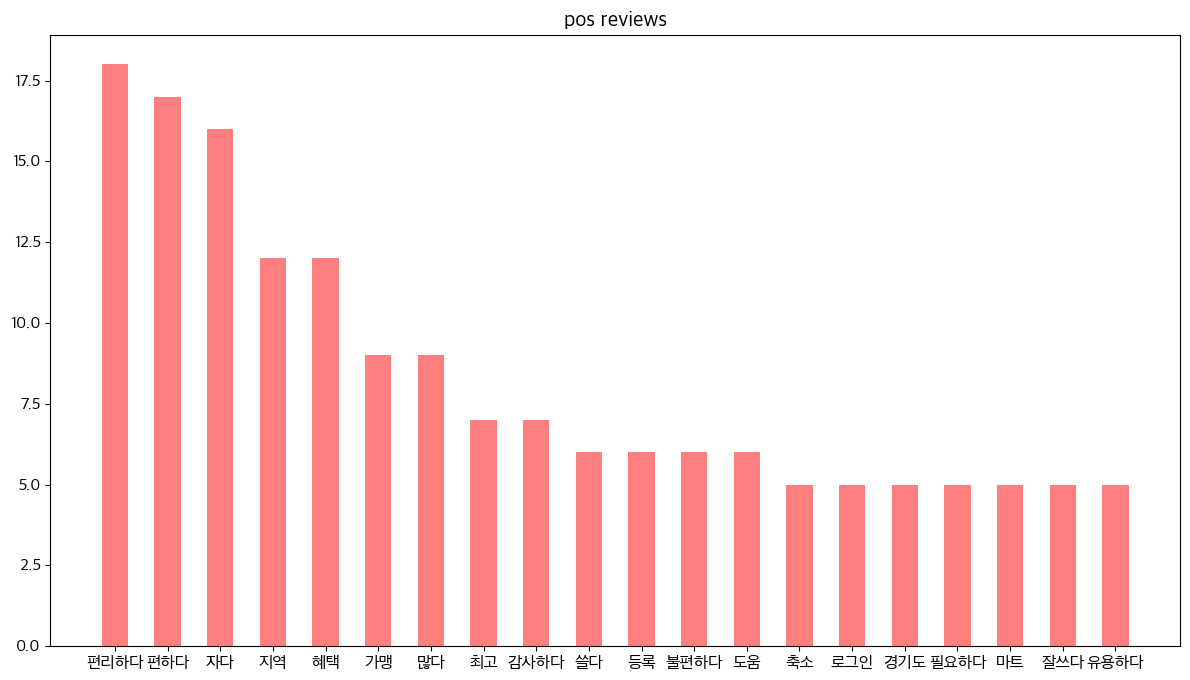

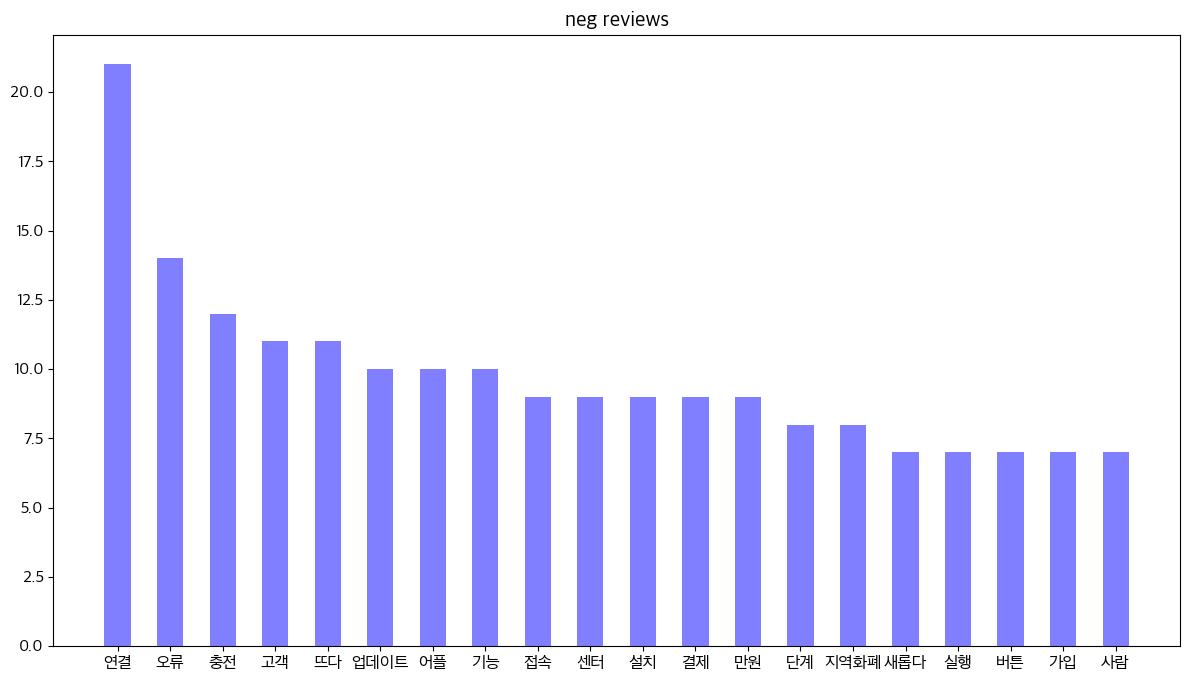

In [37]:
# STEP5-1. 시각화(히스토그램 그리기)
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # 맥북은 ~/Library/Fonts/NGULIM.TTF 활용
font = font_manager.FontProperties(fname=font_path).get_name() # 특정 폰트 파일을 사용하여 그래프에 적용할 글꼴을 부여하는 방법
rc('font', family=font)

# 히스토그램을 그리기 위한 함수 작성
import matplotlib.pyplot as plt

def draw_top_hist(data, name, color):
    top_20 = data[:20]  # 상위 20개의 단어에 대해 막대그래프를 그릴 것
    plt.figure(figsize=(12, 7.5))  # 그래프의 크기 조정
    plt.rc('font', family=font)  # 그래프의 폰트 설정
    plt.title(name, fontsize = 15)  # 그래프의 이름 설정

    # x축 눈금 레이블 크기 설정
    plt.xticks(fontsize=12)  # x축에 작성되는 글자의 크기 조정

    # y축 눈금 레이블 크기 설정
    plt.yticks(fontsize=12)  # y축에 작성되는 글자의 크기 조정

    plt.bar(top_20.index, top_20.values, width=0.5, color=color, alpha=0.5)  # 상위 20개의 단어에 대해 막대그래프를 그리는 코드, bar 함수를 통해 막대그래프 작성
    # plt.barh(top_20.index, top_20.values, width=0.5, color=color, alpha=0.5)  가로 막대 그래프를 그리기 위해서 사용
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 막대 그래프가 눈에 잘 보이도록 여백을 설정하는 과정(생략 가능)
    plt.show()
    
    
draw_top_hist(final_pos_freq, 'pos reviews', 'r')  # 공통어 처리후 긍정리뷰 단어 빈도 히스토그램

draw_top_hist(final_neg_freq, 'neg reviews', 'b')  # 공통어 처리후 부정리뷰 단어 빈도 히스토그램

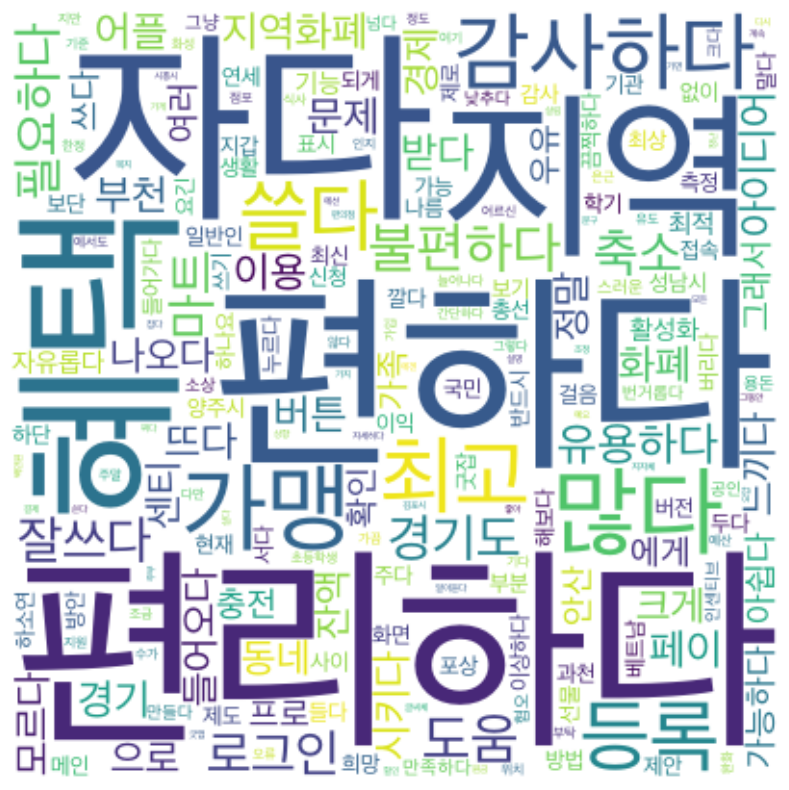

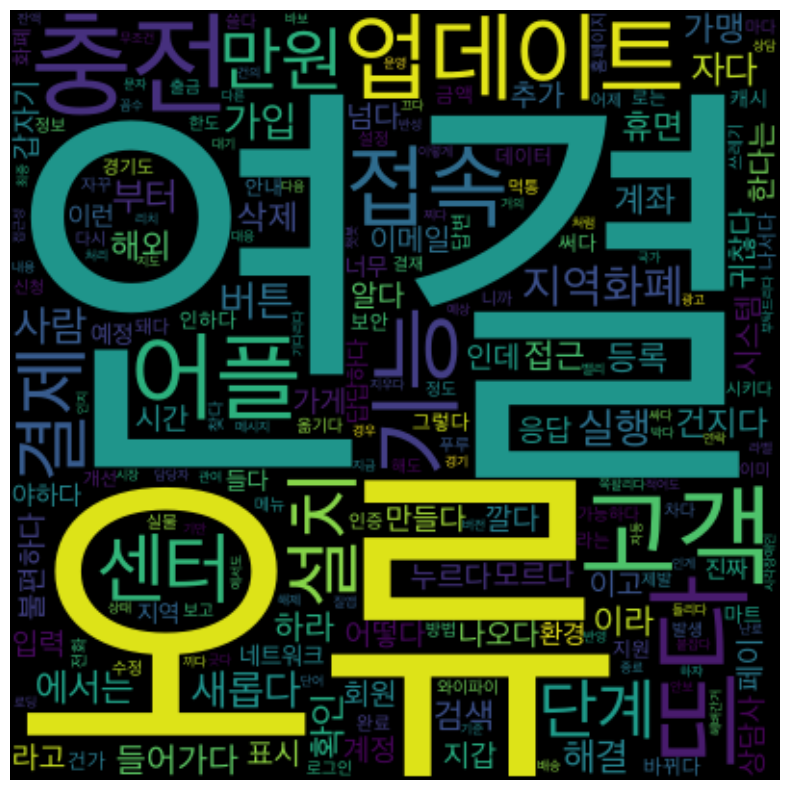

In [38]:
#%% STEP5-2. 시각화(워드클라우드 그리기)

# 워드클라우드를 그리기 위한 패키지 설치
!pip install wordcloud  

from wordcloud import WordCloud  # WordCloud 모듈 import 추가

# 긍정리뷰에 대한 워드클라우드
wc = WordCloud(font_path, width = 400, height = 400, max_font_size = 250, background_color='white')
wordcloud_image = wc.generate_from_frequencies(final_pos_freq) # 최종적으로 추출된 긍정리뷰를 대입
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_image, interpolation='bilinear')  # 이미지 데이터 생성
plt.axis('off')
plt.show()  # 생성된 이미지 데이터를 화면에 그림으로 표시

# 부정리뷰에 대한 워드클라우드
wc = WordCloud(font_path, width = 400, height = 400, max_font_size = 250, background_color='black')
wordcloud_image = wc.generate_from_frequencies(final_neg_freq)  # 최종적으로 추출된 부정리뷰를 대입
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()